<a href="https://colab.research.google.com/github/akiabe/coursera-dl-tf-in-practice/blob/master/C2W4_Multi_Class_Classification_RockPaperScissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download example data
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-06-16 08:02:13--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  86.6MB/s    in 2.2s    

2020-06-16 08:02:15 (86.6 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-06-16 08:02:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 2a00:1450:4013:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tm

In [0]:
# Access to the file system and unzip file
import os
import zipfile

# UnZip to '/tmp' directory
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [0]:
# Define rock, paper and scissors directory
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

In [4]:
print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

total training rock images: 840
total training paper images: 840
total training scissors images: 840


In [7]:
# Check filenames in each directory
rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

print(rock_files[:10])
print(paper_files[:10])
print(scissors_files[:10])

['rock01-098.png', 'rock05ck01-099.png', 'rock05ck01-013.png', 'rock07-k03-062.png', 'rock01-111.png', 'rock07-k03-087.png', 'rock03-002.png', 'rock06ck02-089.png', 'rock04-019.png', 'rock07-k03-019.png']
['paper06-003.png', 'paper05-115.png', 'paper06-045.png', 'paper03-092.png', 'paper05-070.png', 'paper05-098.png', 'paper04-082.png', 'paper03-089.png', 'paper04-046.png', 'paper04-012.png']
['scissors02-074.png', 'testscissors02-101.png', 'scissors02-024.png', 'testscissors03-090.png', 'testscissors02-112.png', 'scissors01-088.png', 'testscissors03-061.png', 'testscissors02-034.png', 'scissors01-074.png', 'scissors04-053.png']


/tmp/rps/rock/rock01-098.png


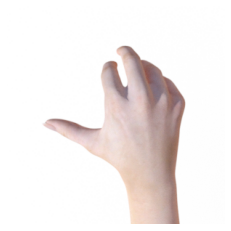

/tmp/rps/rock/rock05ck01-099.png


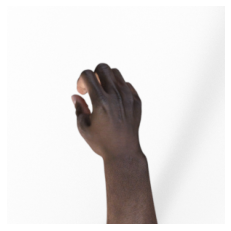

/tmp/rps/paper/paper06-003.png


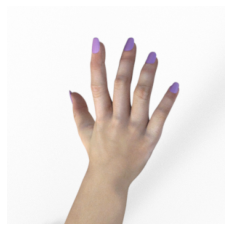

/tmp/rps/paper/paper05-115.png


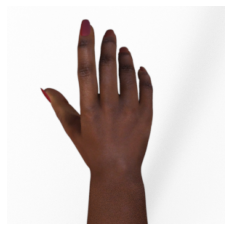

/tmp/rps/scissors/scissors02-074.png


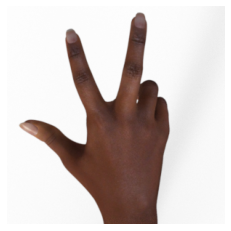

/tmp/rps/scissors/testscissors02-101.png


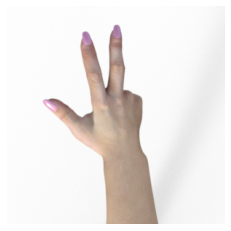

In [10]:
# Plot images
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock + next_paper + next_scissors):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [0]:
import tensorflow as tf

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 126 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150, 150),
        batch_size=126,
        class_mode='categorical')

# Flow validation images in batches of 126 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(150, 150),
        batch_size=126,
        class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [0]:
# Build the model
model = tf.keras.models.Sequential([
    # Input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [0]:
# Optimizer
from tensorflow.keras.optimizers import RMSprop

model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['accuracy']
)

In [19]:
# Training the model
history = model.fit(
    train_generator,
    epochs=25,
    steps_per_epoch=20,
    validation_data = validation_generator,
    verbose = 1,
    validation_steps=3
)

model.save("rps.h5")

Epoch 1/25
20/20 [==============================] - 19s 945ms/step - loss: 1.0866 - accuracy: 0.3948 - val_loss: 1.0440 - val_accuracy: 0.4812
Epoch 2/25
20/20 [==============================] - 19s 942ms/step - loss: 1.0484 - accuracy: 0.4409 - val_loss: 1.0028 - val_accuracy: 0.3333
Epoch 3/25
20/20 [==============================] - 19s 944ms/step - loss: 0.9979 - accuracy: 0.5016 - val_loss: 0.8179 - val_accuracy: 0.7312
Epoch 4/25
20/20 [==============================] - 19s 950ms/step - loss: 0.9245 - accuracy: 0.5833 - val_loss: 0.7092 - val_accuracy: 0.8522
Epoch 5/25
20/20 [==============================] - 19s 941ms/step - loss: 0.8630 - accuracy: 0.6028 - val_loss: 0.7654 - val_accuracy: 0.7070
Epoch 6/25
20/20 [==============================] - 19s 953ms/step - loss: 0.7928 - accuracy: 0.6464 - val_loss: 0.5488 - val_accuracy: 0.9005
Epoch 7/25
20/20 [==============================] - 19s 953ms/step - loss: 0.7103 - accuracy: 0.6972 - val_loss: 0.7116 - val_accuracy: 0.5618

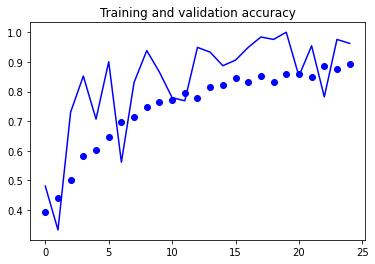

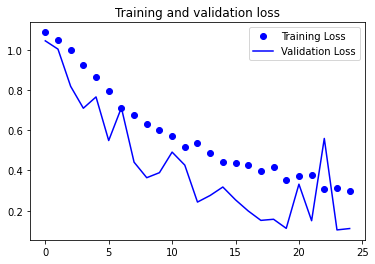

In [22]:
# Plotting accuracy
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
# Predict the images
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving paper1.png to paper1.png
Saving paper2.png to paper2.png
Saving paper3.png to paper3.png
Saving paper4.png to paper4.png
Saving paper5.png to paper5.png
Saving paper6.png to paper6.png
Saving paper7.png to paper7.png
Saving paper8.png to paper8.png
Saving paper9.png to paper9.png
Saving paper-hires1.png to paper-hires1.png
Saving paper-hires2.png to paper-hires2.png
Saving rock1.png to rock1.png
Saving rock2.png to rock2.png
Saving rock3.png to rock3.png
Saving rock4.png to rock4.png
Saving rock5.png to rock5.png
Saving rock6.png to rock6.png
Saving rock7.png to rock7.png
Saving rock8.png to rock8.png
Saving rock9.png to rock9.png
Saving rock-hires1.png to rock-hires1.png
Saving rock-hires2.png to rock-hires2.png
Saving scissors1.png to scissors1.png
Saving scissors2.png to scissors2.png
Saving scissors3.png to scissors3.png
Saving scissors4.png to scissors4.png
Saving scissors5.png to scissors5.png
Saving scissors6.png to scissors6.png
Saving scissors7.png to scissors7.png
Savi